In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import seaborn as sns
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization

To test if you're using GPU or CPU for training

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 77% 67.0M/86.8M [00:00<00:00, 252MB/s]
100% 86.8M/86.8M [00:00<00:00, 253MB/s]


In [ ]:
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

Image Shape (641, 557, 3)


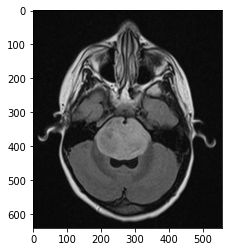

In [ ]:
image = plt.imread("/content/Testing/glioma_tumor/image(2).jpg")
print(f"Image Shape {image.shape}")
plt.imshow(image)

Image Shape (554, 554, 3)


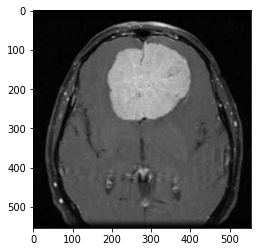

In [ ]:
image = plt.imread("/content/Testing/meningioma_tumor/image(2).jpg")
print(f"Image Shape {image.shape}")
plt.imshow(image)

Image Shape (512, 488, 3)


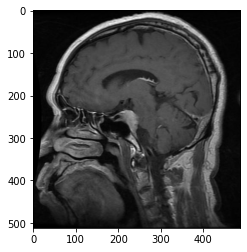

In [ ]:
image = plt.imread("/content/Testing/pituitary_tumor/image(2).jpg")
print(f"Image Shape {image.shape}")
plt.imshow(image)

Image Shape (218, 236, 3)


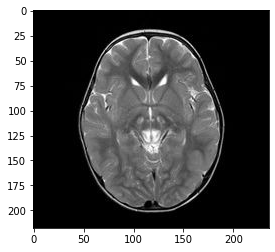

In [ ]:
image = plt.imread("/content/Testing/no_tumor/image(2).jpg")
print(f"Image Shape {image.shape}")
plt.imshow(image)

Appending the training data into dataframes train_X, train_y

In [ ]:
labels=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
train_X=[]
train_y=[]
image_size=224

for i in labels:
    folderPath=os.path.join('/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size, image_size))
        train_X.append(img)
        train_y.append(i)
train_X=np.array(train_X)
train_y=np.array(train_y)

100%|██████████| 827/827 [00:02<00:00, 287.28it/s]


In [ ]:
labels=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
test_X=[]
test_y=[]
for i in labels:
    folderPath = os.path.join('/content/Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        test_X.append(img)
        test_y.append(i)
test_X = np.array(test_X)
test_y = np.array(test_y)

100%|██████████| 74/74 [00:00<00:00, 165.38it/s]


In [ ]:
train_X.shape

(2870, 224, 224, 3)

In [ ]:
test_X.shape

(394, 224, 224, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


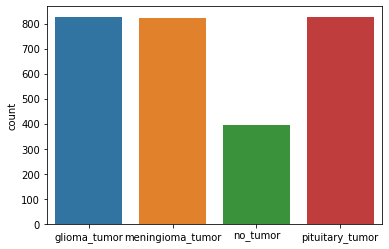

In [ ]:
sns.countplot(train_y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


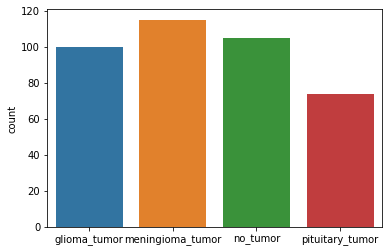

In [ ]:
sns.countplot(test_y)

In [ ]:
train_y_digits=[]
for i in train_y:
  train_y_digits.append(labels.index(i))
train_y=train_y_digits
train_y=tf.keras.utils.to_categorical(train_y)

In [ ]:
test_y_digits=[]
for i in test_y:
    test_y_digits.append(labels.index(i))
test_y=test_y_digits
test_y=tf.keras.utils.to_categorical(test_y)

# New Section

In [ ]:
train_X = np.array(train_X)/255.
test_X = np.array(test_X)/255.

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) 

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(4)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 activation_7 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 activation_8 (Activation)   (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                  

In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = 'accuracy')

In [ ]:
history=model.fit(train_X,train_y,verbose=1, batch_size = 32,epochs = 20)

Epoch 1/20
90/90 [==============================] - 22s 236ms/step - loss: 0.9494 - accuracy: 0.7181
Epoch 2/20
90/90 [==============================] - 22s 241ms/step - loss: 0.4213 - accuracy: 0.8429
Epoch 3/20
90/90 [==============================] - 22s 244ms/step - loss: 0.2680 - accuracy: 0.9028
Epoch 4/20
90/90 [==============================] - 21s 238ms/step - loss: 0.1928 - accuracy: 0.9300
Epoch 5/20
90/90 [==============================] - 21s 238ms/step - loss: 0.1767 - accuracy: 0.9443
Epoch 6/20
90/90 [==============================] - 22s 240ms/step - loss: 0.1568 - accuracy: 0.9463
Epoch 7/20
90/90 [==============================] - 22s 241ms/step - loss: 0.0977 - accuracy: 0.9641
Epoch 8/20
90/90 [==============================] - 22s 239ms/step - loss: 0.0606 - accuracy: 0.9780
Epoch 9/20
90/90 [==============================] - 22s 239ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 10/20
90/90 [==============================] - 22s 239ms/step - loss: 0.0356 - accura

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


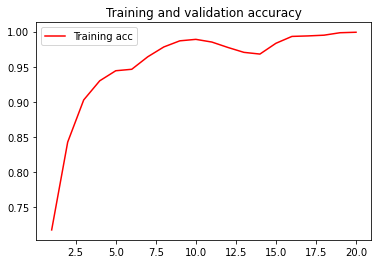

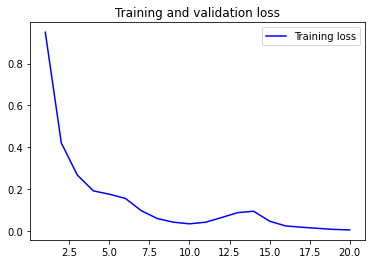

In [ ]:
model.save('cnn_model.h5')
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
pred = model.predict(test_X)
pred = np.argmax(pred,axis=1)
test_y_new = np.argmax(test_y,axis=1)

In [ ]:
accuracy = np.sum(pred==test_y_new)/len(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 75.89%
